In [ ]:
#import the necessary liraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#import the datstet
df = pd.read_csv('laptop_cleaned2.csv')

In [ ]:
df.head()

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,...,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,50399,4.30,AMD,AMD Ryzen 5,5600H,5.0,6.0,...,AMD Radeon RX 6500M,AMD,4.0,False,15.6,1920,1080,141.21,True,Windows 11 OS
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,Lenovo,26690,4.45,AMD,AMD Ryzen 3,7320U,7.0,4.0,...,AMD Radeon Graphics,AMD,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,HP,37012,4.65,Intel,Intel Core i3,1215U,12.0,6.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,Samsung,69990,4.75,Intel,Intel Core i5,1240P,12.0,12.0,...,Intel Iris Xe Graphics,Intel,NaN,False,13.3,1080,1920,165.63,False,Windows 11 OS
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno,23990,4.25,Intel,Intel Core i3,1115G4,11.0,2.0,...,Intel UHD Graphics,Intel,NaN,False,15.6,1920,1080,141.21,False,Windows 11 OS


In [ ]:
#@title find the size of the dataset
df.shape

(1020, 29)

In [ ]:
#@title find the null values are presented into the dataset
df.isnull().sum()

,0
Unnamed: 0,0
Name,0
Brand,0
Price,0
Rating,0
Processor_brand,0
Processor_name,0
Processor_variant,24
Processor_gen,129
Core_per_processor,12


<Axes: >

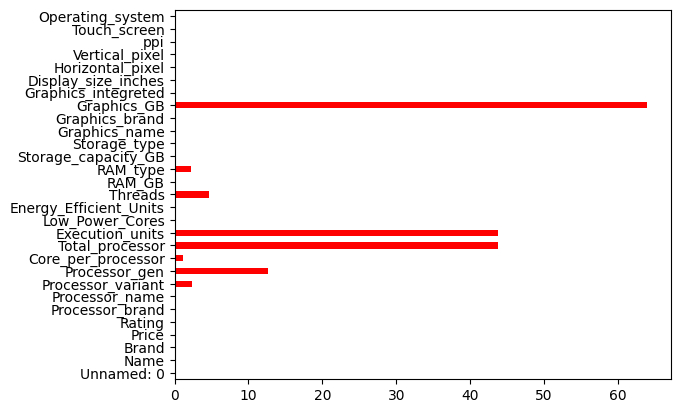

In [ ]:
#@title Calculate the percentage of null values spreaded in the dataset

missing_values= (df.isnull().sum()/len(df))*100

missing_values.plot(kind= 'barh',color='red')


In [ ]:
#@title Date Preprocessing

# Using Simple Imputer to fill the null values in the dataset


def get_parameter(df):
  parameters = {}
  for col in df.columns[df.isnull().any()]:
    if  df[col].dtype == 'float64' or df[col].dtype == 'int64' or df[col].dtype == 'int32':
      strategy = 'mean'
    else :
      strategy = 'most_frequent' # mode
    missing_values = df[col][df[col].isnull()].values[0] # whatever missing value is there in my column just apply the missing value in variable
    parameters[col] = {'missing_values' : missing_values, 'strategy' : strategy}
  return parameters

get_parameter(df)

{'Processor_variant': {'missing_values': nan, 'strategy': 'most_frequent'},
 'Processor_gen': {'missing_values': nan, 'strategy': 'mean'},
 'Core_per_processor': {'missing_values': nan, 'strategy': 'mean'},
 'Total_processor': {'missing_values': nan, 'strategy': 'mean'},
 'Execution_units': {'missing_values': nan, 'strategy': 'mean'},
 'Threads': {'missing_values': nan, 'strategy': 'mean'},
 'RAM_type': {'missing_values': nan, 'strategy': 'most_frequent'},
 'Graphics_name': {'missing_values': nan, 'strategy': 'most_frequent'},
 'Graphics_brand': {'missing_values': nan, 'strategy': 'most_frequent'},
 'Graphics_GB': {'missing_values': nan, 'strategy': 'mean'},
 'Graphics_integreted': {'missing_values': nan, 'strategy': 'most_frequent'}}

In [ ]:
from sklearn.impute import SimpleImputer
parameters = get_parameter(df)

for col,param in parameters.items(): #items to access both values and keys in dict
  missing_values = param['missing_values']
  strategy = param['strategy']
  imp = SimpleImputer(missing_values = missing_values, strategy = strategy)
  df[[col]] = imp.fit_transform(df[[col]])


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.isnull().sum()

,0
Name,0
Brand,0
Price,0
Rating,0
Processor_brand,0
Processor_name,0
Processor_variant,0
Processor_gen,0
Core_per_processor,0
Total_processor,0


In [ ]:
numeric_columns = df.select_dtypes(include=['number'])  # Numeric columns (int, float)
categorical_columns = df.select_dtypes(include=['object', 'category'])

In [ ]:
#@title convert the categorical data into numerical data

# using label encoder to encode the categorical data into a numerical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
  df[col] = le.fit_transform(df[col])


In [ ]:
df.head()

,Name,Brand,Price,Rating,Processor_brand,Processor_name,Processor_variant,Processor_gen,Core_per_processor,Total_processor,...,Graphics_name,Graphics_brand,Graphics_GB,Graphics_integreted,Display_size_inches,Horizontal_pixel,Vertical_pixel,ppi,Touch_screen,Operating_system
0,580,11,50399,4.30,0,4,74,5.0,6.0,3.926702,...,22,0,4.000000,0,15.6,1920,1080,141.21,True,11
1,837,17,26690,4.45,0,3,87,7.0,4.0,3.926702,...,19,0,5.940217,0,15.6,1920,1080,141.21,False,11
2,426,11,37012,4.65,3,23,20,12.0,6.0,2.000000,...,84,4,5.940217,0,15.6,1920,1080,141.21,False,11
3,992,23,69990,4.75,3,24,24,12.0,12.0,4.000000,...,79,4,5.940217,0,13.3,1080,1920,165.63,False,11
4,994,24,23990,4.25,3,23,8,11.0,2.0,3.926702,...,84,4,5.940217,0,15.6,1920,1080,141.21,False,11


In [ ]:

corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

                            Name     Brand     Price    Rating  \
Name                    1.000000  0.969333  0.093691 -0.042213   
Brand                   0.969333  1.000000  0.048315 -0.043250   
Price                   0.093691  0.048315  1.000000 -0.042246   
Rating                 -0.042213 -0.043250 -0.042246  1.000000   
Processor_brand         0.038492  0.052772  0.111506  0.026127   
Processor_name          0.049763  0.054789  0.186194  0.024340   
Processor_variant       0.016093  0.011287  0.029352  0.008371   
Processor_gen           0.018069  0.021993  0.241718 -0.001386   
Core_per_processor      0.119715  0.082427  0.690558 -0.001736   
Total_processor         0.027879 -0.002264  0.525754  0.000629   
Execution_units         0.107130  0.099045  0.448965 -0.008747   
Low_Power_Cores         0.154052  0.144724  0.201841 -0.040184   
Energy_Efficient_Units  0.154052  0.144724  0.201841 -0.040184   
Threads                 0.129362  0.078348  0.665919 -0.012836   
RAM_GB    

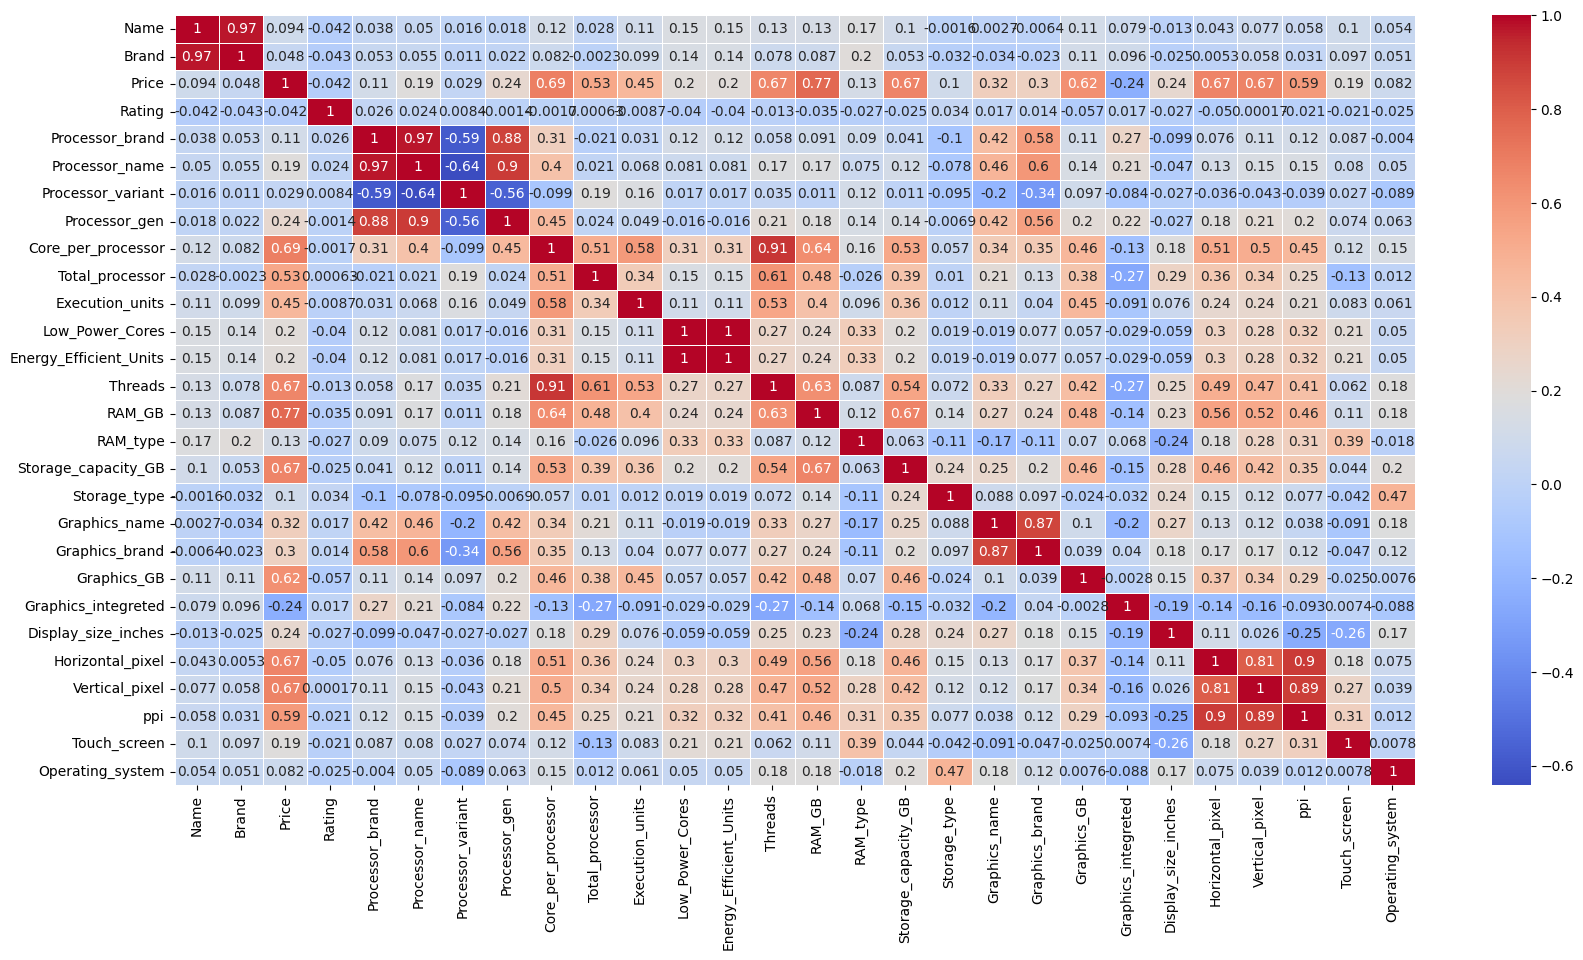

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


<ipython-input-16-dd200cb6b0da>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left')


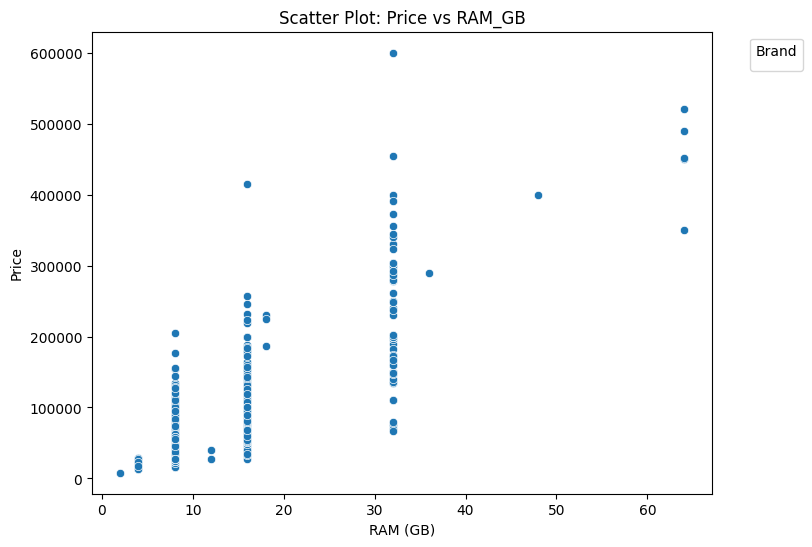

In [ ]:
#@title relationship between price and ram_gb
# Scatter plot: Price vs RAM_GB
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="RAM_GB", y="Price")
plt.title("Scatter Plot: Price vs RAM_GB")
plt.xlabel("RAM (GB)")
plt.ylabel("Price")
plt.legend(title="Brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

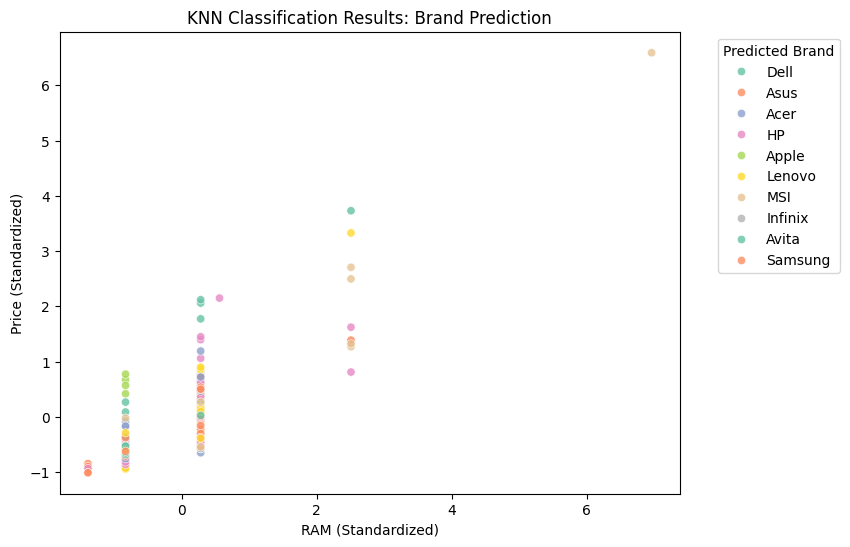

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("laptop_cleaned2.csv")

# Select features and target
X = data[["RAM_GB", "Price"]]  # Features
y = data["Brand"]  # Target (categorical)

# Encode the target variable (Brand) as numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Standardize the features for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Use 5 neighbors
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Visualize the results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=label_encoder.inverse_transform(y_pred), palette="Set2", alpha=0.8)
plt.title("KNN Classification Results: Brand Prediction")
plt.xlabel("RAM (Standardized)")
plt.ylabel("Price (Standardized)")
plt.legend(title="Predicted Brand", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


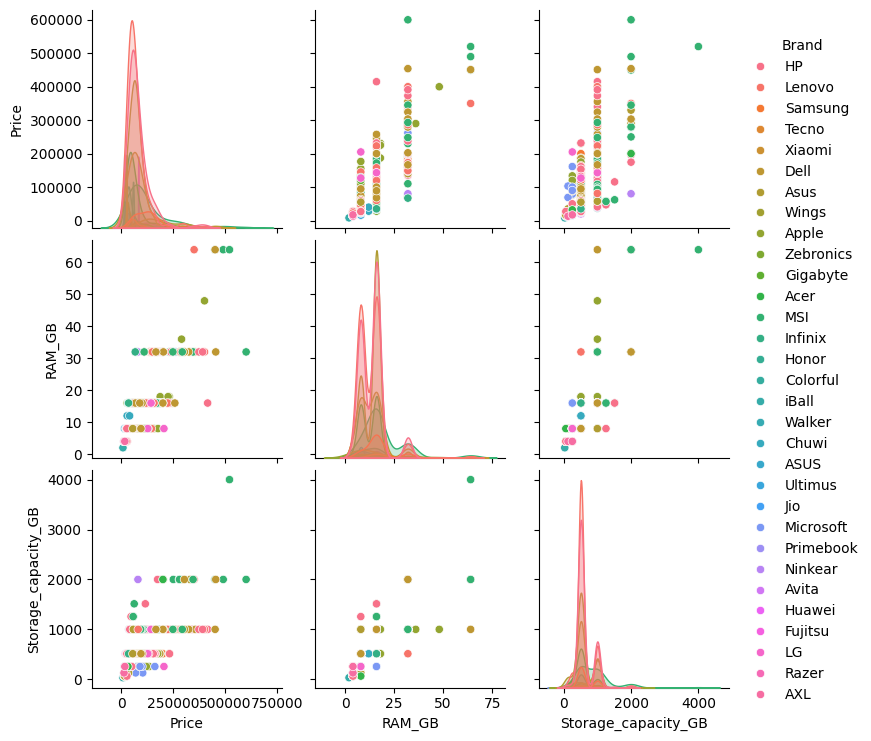

In [ ]:
sns.pairplot(data, vars=["Price", "RAM_GB", "Storage_capacity_GB"], hue="Brand")


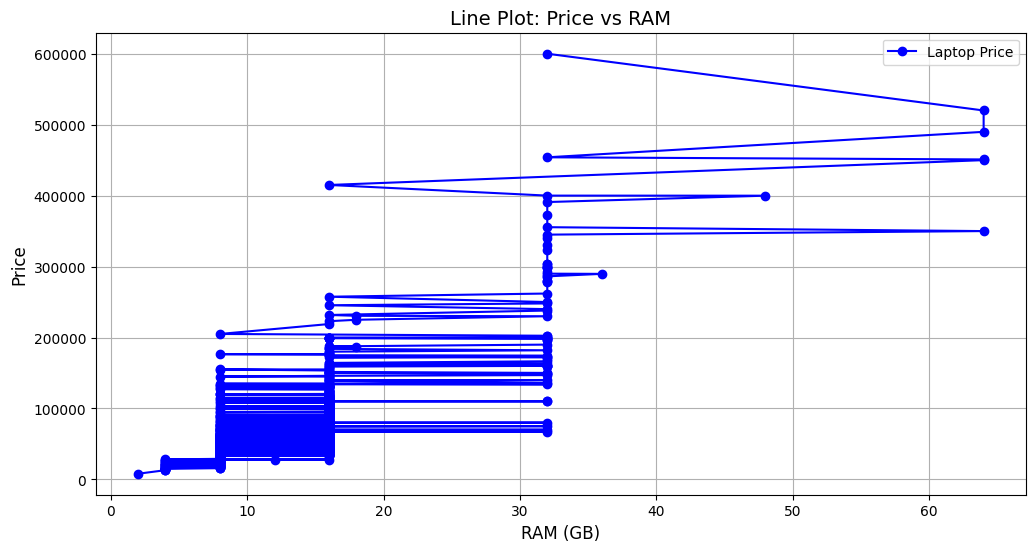

In [26]:
import matplotlib.pyplot as plt

# Example data for line plot
data.sort_values(by="Price", inplace=True)  # Ensure sorted data if x-axis is sequential
plt.figure(figsize=(12, 6))  # Increase figure size
plt.plot(data["RAM_GB"], data["Price"], label="Laptop Price", color="blue", marker="o")
plt.title("Line Plot: Price vs RAM", fontsize=14)
plt.xlabel("RAM (GB)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(True)  # Add grid for better readability
plt.legend(loc="best")  # Add legend
plt.show()


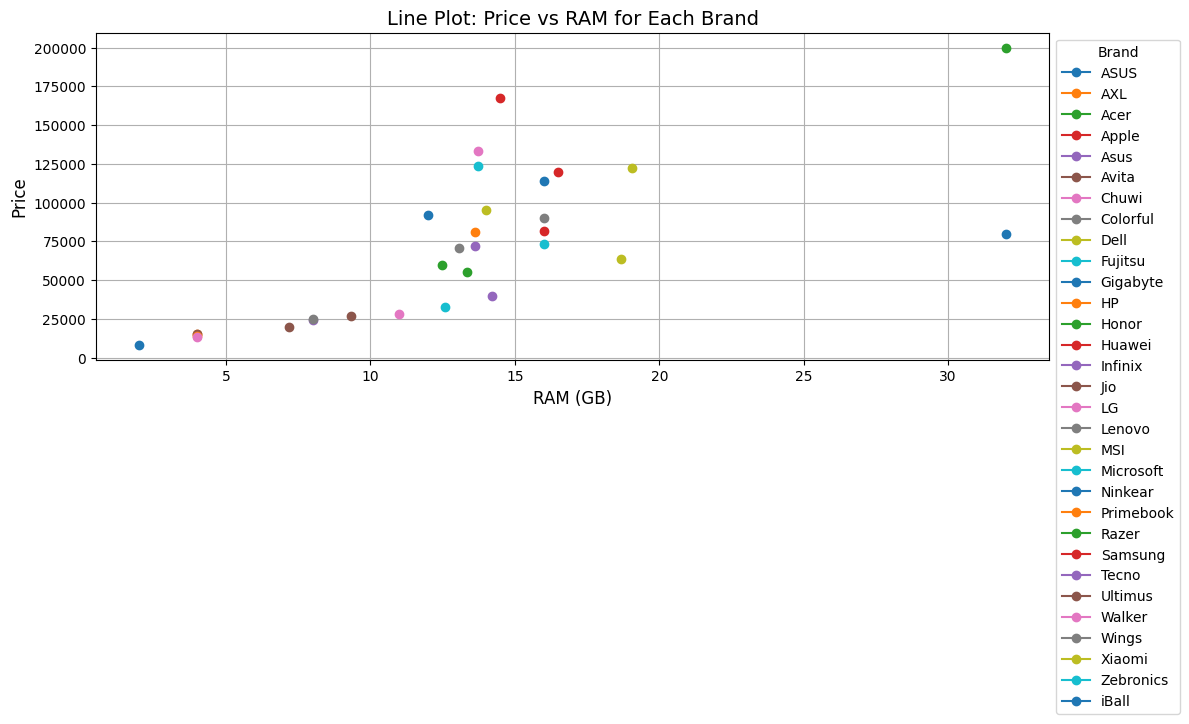

In [27]:
# Group data by brand and aggregate for line plot
grouped_data = data.groupby("Brand")[["RAM_GB", "Price"]].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
for brand in grouped_data["Brand"].unique():
    brand_data = grouped_data[grouped_data["Brand"] == brand]
    plt.plot(
        brand_data["RAM_GB"],
        brand_data["Price"],
        label=brand,
        marker="o"
    )

plt.title("Line Plot: Price vs RAM for Each Brand", fontsize=14)
plt.xlabel("RAM (GB)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.grid(True)
plt.legend(title="Brand", loc="upper left", bbox_to_anchor=(1, 1))  # Place legend outside
plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()
